# laoding dataset

source : http://segchd.csail.mit.edu/data.html 

In [ ]:
#Axial full volume data

!wget  -O axial_fv_images.zip https://challenge.kitware.com/api/v1/folder/56f42342cad3a53ead8b1b82/download
!wget  -O axial_fv_labels.zip https://challenge.kitware.com/api/v1/folder/56f42342cad3a53ead8b1b81/download

#Axial cropped data

!wget  -O axial_cropped_images.zip https://challenge.kitware.com/api/v1/folder/5756d181cad3a51cc6346712/download
!wget  -O axial_cropped_labels.zip https://challenge.kitware.com/api/v1/folder/5756d181cad3a51cc6346711/download

#short axis cropped data

!wget  -O sax_cropped_images.zip https://challenge.kitware.com/api/v1/folder/5756d2dacad3a51cc634678f/download
!wget  -O sax_cropped_labels.zip https://challenge.kitware.com/api/v1/folder/5756d2dacad3a51cc634678e/download

--2020-06-02 13:40:08--  https://challenge.kitware.com/api/v1/folder/56f42342cad3a53ead8b1b82/download
Resolving challenge.kitware.com (challenge.kitware.com)... 54.208.189.152
Connecting to challenge.kitware.com (challenge.kitware.com)|54.208.189.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘axial_fv_images.zip’

axial_fv_images.zip     [              <=>   ] 271.94M  15.2MB/s    in 20s     

2020-06-02 13:40:29 (13.9 MB/s) - ‘axial_fv_images.zip’ saved [285149614]

--2020-06-02 13:40:31--  https://challenge.kitware.com/api/v1/folder/56f42342cad3a53ead8b1b81/download
Resolving challenge.kitware.com (challenge.kitware.com)... 54.208.189.152
Connecting to challenge.kitware.com (challenge.kitware.com)|54.208.189.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘axial_fv_labels.zip’

axial_fv_labels.zip     [      <=>           ]   1.41M  1007KB/s

In [ ]:
!unzip \*.zip


Archive:  axial_cropped_labels.zip
 extracting: Ground truth/training_axial_crop_pat0-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat1-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat2-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat3-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat4-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat5-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat6-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat7-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat8-label.nii.gz  
 extracting: Ground truth/training_axial_crop_pat9-label.nii.gz  

Archive:  axial_fv_labels.zip
 extracting: Ground truth/training_axial_full_pat0-label.nii.gz  
 extracting: Ground truth/training_axial_full_pat1-label.nii.gz  
 extracting: Ground truth/training_axial_full_pat2-label.nii.gz  
 extracting: Ground truth/training_axial_full_pat3-label.nii.gz  
 extractin

# Visualizing the data

In [ ]:
!pip install nilearn

     |████████████████████████████████| 2.5MB 2.7MB/s 


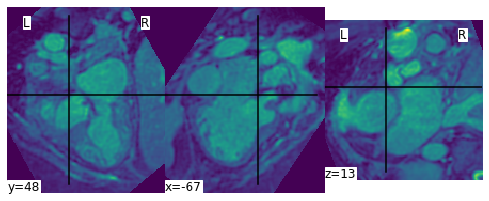

In [ ]:
from nilearn import plotting


plotting.plot_img("Training dataset/training_sa_crop_pat3.nii.gz")

# Creating JPG images from .nii files

source :  https://github.com/FNNDSC/med2image

In [ ]:
!pip3 install med2image

     |████████████████████████████████| 35.5MB 88kB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 634kB 40.5MB/s 
  Created wheel for med2image: filename=med2image-2.2.4-cp36-none-any.whl size=15047 sha256=93793df3c657b778cb47390cf0e1c7ccff3220cb3c957aea2a8171096d8b0ed4
  Stored in directory: /root/.cache/pip/wheels/7e/71/e8/7f4b51075d1f5329f851b2e64012fcf729a47ffe710d47b26c
  Created wheel for pfmisc: filename=pfmisc-1.3.32-cp36-none-any.whl size=43383 sha256=79931734b5827ee067d8da3207484db6756b61eb85a4ecd7eefd44d54331be44
  Stored in directory: /root/.cache/pip/wheels/c8/ab/2f/d00fb7e356b774222be46dd5ffd57877e05c69cb199a426fe5
  Created wheel for pudb: filename=pudb-2019.2-cp36-none-any.whl size=63233 sha256=575df2ca1f6787a48781e6ed93bff48bea309a325741f2f9cad79b2ecf90fa83
  Stored in directory: /root/.cache/pip/wheels/5a/17/bd/9b8fc905b71d3032f3e76757a275a25c46c6f9bbb5fcf7b5e9
  Created wheel for urwid: filename=urwid-2.1.0-cp36-cp36

# Unpacking .nii files to png files

source : https://pypi.org/project/med2image/

In [ ]:
cd Training\ dataset

/content/Training dataset


In [ ]:
!gunzip *.gz

In [ ]:
cd ..

/content


In [ ]:
cd Ground\ truth

/content/Ground truth


In [ ]:
!gunzip *.gz

**loading file names into train files and labels files to be used later**

In [ ]:
cd ..

/content


In [ ]:

!ls $"Training dataset" > train_files.txt
!ls $"Ground truth" > label_files.txt

In [ ]:
%%bash
i=0
cat train_files.txt | while read line 
do
   # do something with $line here
   
   med2image -i "Training dataset/"$line                \
             -d raw_images                 \
             -o "file-"$i".png" -s -1
   i=$((i+1))
done
i=0
cat label_files.txt | while read line 
do
   # do something with $line here
   
   med2image -i "Ground truth/"$line                \
             -d raw_labels                \
             -o "file-"$i".png" -s -1
  i=$((i+1))
done



sliceToConvert: -1
2020-06-02 13:42:47  |    e475a46a00ee |                  med2image.py:med2image.run() | About to perform NifTI to png conversion...

2020-06-02 13:42:47  |    e475a46a00ee |                  med2image.py:med2image.run() | 3D volume detected.

2020-06-02 13:42:47  |    e475a46a00ee |             med2image.py:med2image.dim_save() | Image volume logical (i, j, k) size: (127, 207, 141)
2020-06-02 13:42:47  |    e475a46a00ee |           med2image.py:med2image.slice_save() | Outputfile = raw_images//file-0-slice000.png
2020-06-02 13:42:47  |    e475a46a00ee |           med2image.py:med2image.slice_save() | Outputfile = raw_images//file-0-slice001.png
2020-06-02 13:42:47  |    e475a46a00ee |           med2image.py:med2image.slice_save() | Outputfile = raw_images//file-0-slice002.png
2020-06-02 13:42:47  |    e475a46a00ee |           med2image.py:med2image.slice_save() | Outputfile = raw_images//file-0-slice003.png
2020-06-02 13:42:47  |    e475a46a00ee |           med2imag

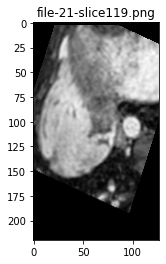

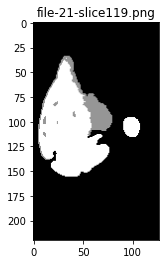

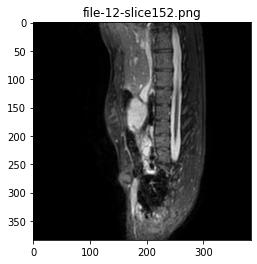

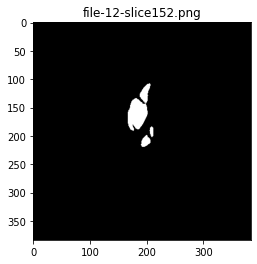

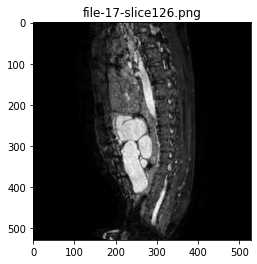

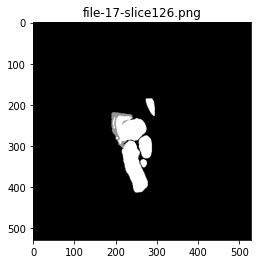

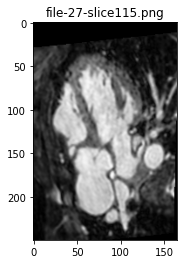

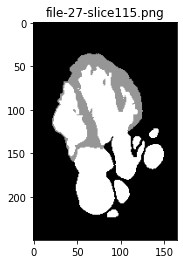

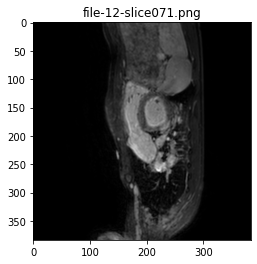

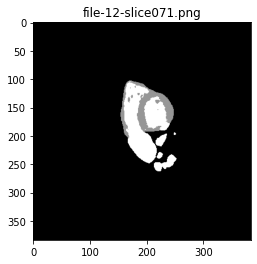

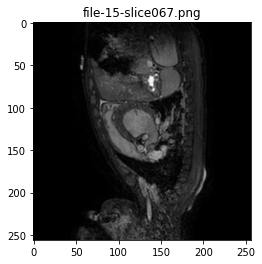

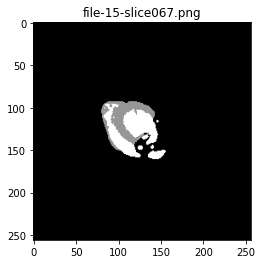

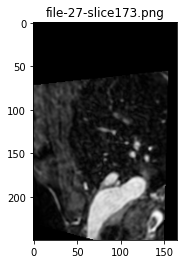

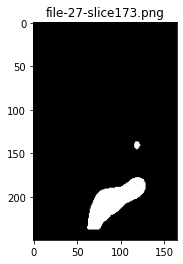

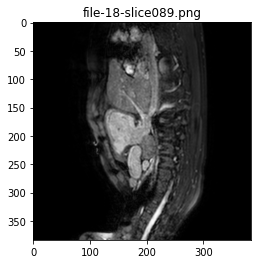

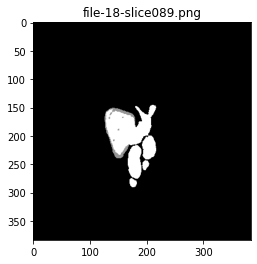

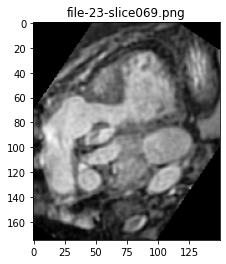

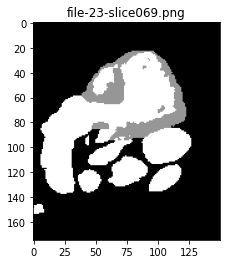

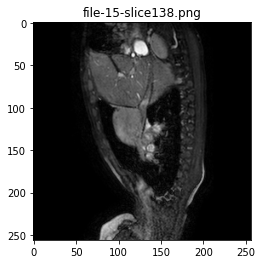

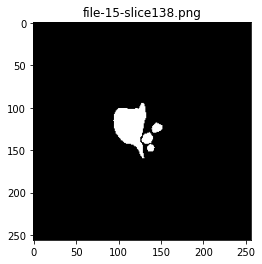

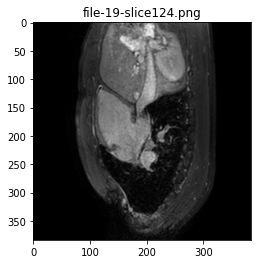

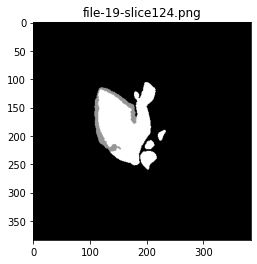

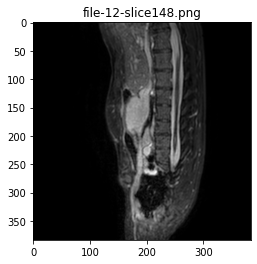

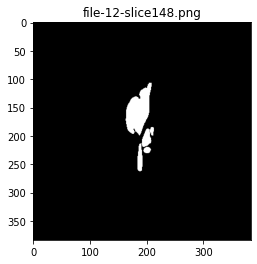

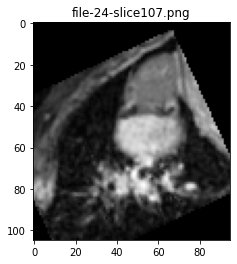

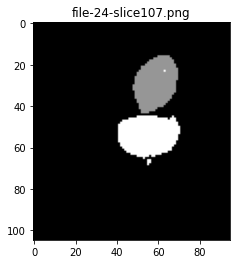

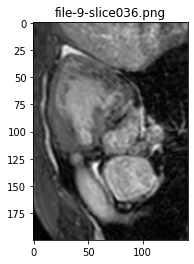

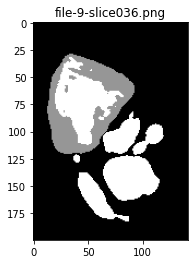

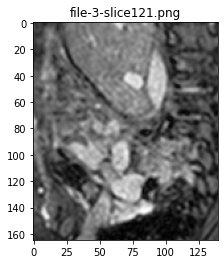

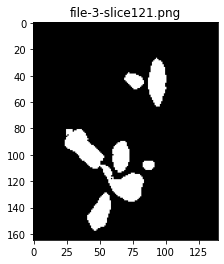

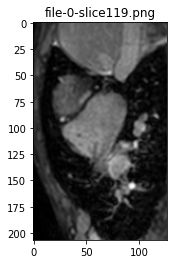

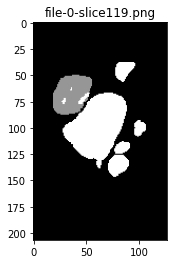

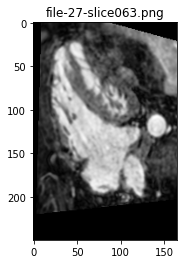

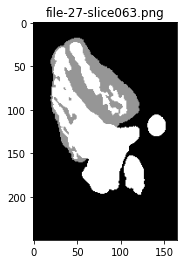

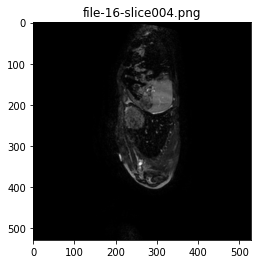

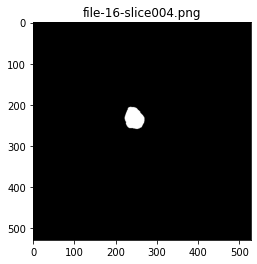

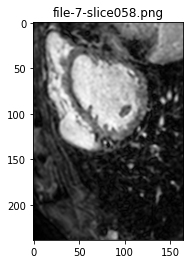

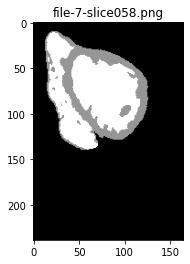

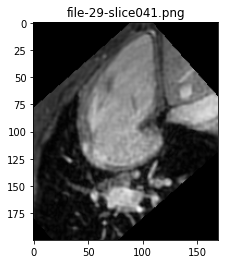

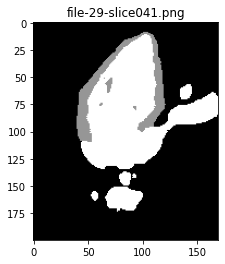

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


images=os.listdir("raw_images")
labels=os.listdir("raw_labels")

for i in range(20):
  im=cv2.imread("raw_images/"+images[i])
  lab=cv2.imread("raw_labels/"+labels[i])

  plt.imshow(im)
  plt.title(images[i])
  plt.show()
  plt.imshow(lab)
  plt.title(labels[i])
  plt.show()
  print("========================================================")

# Creating the model : U-net

source: https://arxiv.org/abs/1505.04597

In [ ]:

import os
import sys
import random
from random import shuffle
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed



In [ ]:
class DataGen(keras.utils.Sequence):
    def __init__(self, file_names, batch_size=8, image_size=128):
        
        self.file_names = file_names
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()

        
    def __load__(self, id_name):
        ## Path
        image_path = os.path.join( "raw_images", id_name) 
        mask_path = os.path.join("raw_labels", id_name)
        
        ## Reading Image
        image = cv2.imread(image_path,  cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        mask = cv2.imread(mask_path,  cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (self.image_size, self.image_size))
            
        ## Normalizaing 
        image = image/255.0
        mask = mask/255.0
        
        return image, mask

    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.file_names):
            self.batch_size = len(self.file_names) - index*self.batch_size
        
        files_batch = self.file_names[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
     
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.file_names)/float(self.batch_size)))

In [ ]:
image_size = 128
epochs = 5
batch_size = 8

file_names=os.listdir("raw_images")
shuffle(file_names)

val_data_size = 300

valid_files = file_names[:val_data_size]
train_files = file_names[val_data_size:]

In [ ]:
gen = DataGen(train_files, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(8, 128, 128) (8, 128, 128)


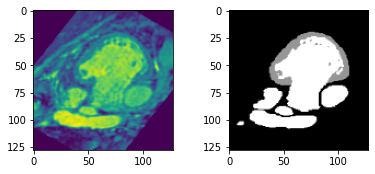

In [ ]:

r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

In [ ]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size,1))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
train_gen = DataGen(train_files, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_files, image_size=image_size, batch_size=batch_size)

train_steps = len(train_files)//batch_size
valid_steps = len(valid_files)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
560/560 [==============================] - 33s 59ms/step - loss: 0.1685 - acc: 0.9008 - val_loss: 0.1033 - val_acc: 0.9265
Epoch 2/5
560/560 [==============================] - 32s 58ms/step - loss: 0.0947 - acc: 0.9282 - val_loss: 0.0826 - val_acc: 0.9307
Epoch 3/5
560/560 [==============================] - 32s 57ms/step - loss: 0.0755 - acc: 0.9344 - val_loss: 0.0680 - val_acc: 0.9355
Epoch 4/5
560/560 [==============================] - 32s 56ms/step - loss: 0.0617 - acc: 0.9388 - val_loss: 0.0587 - val_acc: 0.9378
Epoch 5/5
560/560 [==============================] - 32s 57ms/step - loss: 0.0569 - acc: 0.9403 - val_loss: 0.0534 - val_acc: 0.9393


In [ ]:
model.save("UNET.h5")
x, y = valid_gen.__getitem__(1)
result = model.predict(x)

result = result > 0.5

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.reshape(x[0]*255, (image_size, image_size)), cmap="gray")

# Uploading a pretrained model

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('UNET.h5')

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
import os
import sys
import random
from random import shuffle
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed



class DataGen_test(keras.utils.Sequence):
    def __init__(self, file_names, batch_size=8, image_size=128):
        
        self.file_names = file_names
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()

        
    def __load_test__(self, id_name):
        ## Path
        image_path = os.path.join( "test_files", id_name) 

        
        ## Reading Image
        image = cv2.imread(image_path,  cv2.IMREAD_GRAYSCALE)
        
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        
        ## Normalizaing 
        image = image/255.0
        
        
        return image

    def __getitem_test__(self, index):
        if(index+1)*self.batch_size > len(self.file_names):
            self.batch_size = len(self.file_names) - index*self.batch_size
        
        files_batch = self.file_names[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        
        for id_name in files_batch:
            _img= self.__load_test__(id_name)
            image.append(_img)
            
            
        image = np.array(image)
        
        
        return image
     
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.file_names)/float(self.batch_size)))

In [ ]:
!mkdir test_files

#now upload the files to test_files

In [ ]:
test_files=os.listdir("test_files")
image_size= 128
batch_size= 1
test_gen = DataGen_test(test_files, image_size=image_size, batch_size=batch_size)


test_steps = len(test_files)//batch_size


X= test_gen.__getitem_test__(1)


(1, 128, 128)

In [ ]:
y=new_model.predict(X)

result=np.squeeze(y[0])

[[[49.5 64.5 25.7]]]


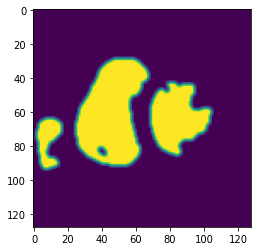

In [ ]:
img_2d         = result.astype(float)
img_2d_scaled  = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
result = np.uint8(img_2d_scaled)
    

edge=cv2.blur(result,(3,3))

edge=cv2.Canny(edge,50,100)

edge=cv2.blur(edge,(3,3),cv2.BORDER_DEFAULT)
circles = cv2.HoughCircles(edge,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=34,minRadius=0,maxRadius=0)
print(circles)
#circles = np.uint16(np.around(circles))

ret,thresh1 = cv2.threshold(result,175,255,cv2.THRESH_BINARY)
thresh1=edge=cv2.blur(thresh1,(3,3))
plt.imshow(thresh1)

In [ ]:
import os
import sys
import random
from random import shuffle
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed



class DataGen_test(keras.utils.Sequence):
    def __init__(self, files, batch_size=8, image_size=128):
        
        self.files = files
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()


    def __getitem_test__(self, index):
        if(index+1)*self.batch_size > len(self.files):
            self.batch_size = len(self.files) - index*self.batch_size
        
        files_batch = self.files[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        
        for id_name in files_batch:
            
            image.append(id_name)
            
            
        image = np.array(image)
        
        
        return image
     
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.file_names)/float(self.batch_size)))

In [ ]:
images=[]

image = cv2.imread("ff.PNG",  cv2.IMREAD_GRAYSCALE)
        
image = cv2.resize(image, (image_size,image_size))
        
        
        ## Normalizaing 
image = image/255.0
images.append(image)

data=DataGen_test(images,batch_size=1)

X=data.__getitem_test__(0)


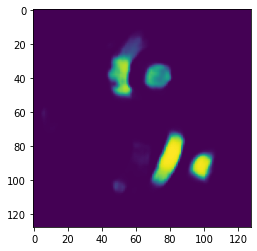

In [ ]:
y=new_model.predict(X)
y=np.squeeze(y[0])
plt.imshow(y)

In [ ]:
image = cv2.imread("image4.jpg",  cv2.IMREAD_GRAYSCALE)
        
image = cv2.resize(image, (image_size,image_size))
        
        
        ## Normalizaing 
image = image/255.0
image = np.expand_dims(image,axis=0)
y=new_model.predict(image)

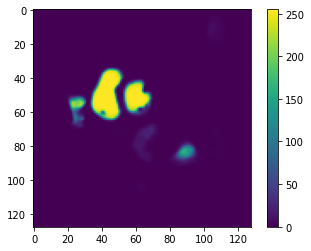

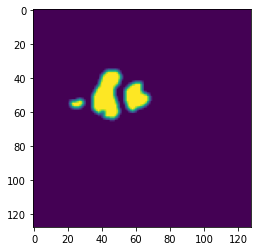

In [ ]:
predicted=y[0]
predicted=np.squeeze(predicted)
predicted=predicted*255.0

plt.imshow(predicted)
plt.colorbar()
plt.show()

ret,thresh1 = cv2.threshold(predicted,175,255,cv2.THRESH_BINARY)
thresh1=edge=cv2.blur(thresh1,(3,3))
plt.imshow(thresh1)
